# Ecommerce Application for business

### Working:

This Application works on two views i.e, in view of customer and in view of Business.

#### Business View:
In this, business can add employee with username/ID and password, with which employee can login can prove credentials to access functionalities related to products like:
  1. Show all products available for listing to customer.
  2. Add Product to make available to customer.
  3. Remove Product to make product unavailable for customers.
  4. Update product details like prodID, prodName, prodCategory, prodDescription, prodQuantity, prodPrice.
  
To implement this view I am using two classes one for Business, and other is for product.

#### CLASS Business

This class is used for employees.

In this class I am using a constructor which is called during employee object creation with ID, Name, Password as attributes.

Apart from business class implementation, we are using a list for storing employee objects.

In [1]:
employees = []                                             #List for storing employee objects.
class Business:
    def __init__(self, empID, empName, empPassword):
        self.empID = empID                                 #Initializing Employee ID
        self.empName = empName                             #Initializing Employee Name
        self.empPassword = empPassword                     #Initializing Employee Password

#### CLASS Product

This class contains all methods related to product(Explained indivually in the code comments), along with it there is constructor which is used to create product objects. On top of that, This class contains list "prods" to store all product objects. 

I used **linear search** as search algorithm for this application.

**Time complexity of linear search is O(N)**


In [2]:
class Product:
    prods = []                                                        #list to store all product objects. 
    def __init__(self, prodID, prodName, prodCategory, prodDescription, prodQuantity, prodPrice):
        self.prodID = prodID                                          #Initializing product ID
        self.prodName = prodName                                      #Initializing product Name
        self.prodCategory = prodCategory                              #Initializing product Category
        self.prodDescription = prodDescription                        #Initializing product Description
        self.prodQuantity = prodQuantity                              #Initializing product Quantity
        self.prodPrice = prodPrice                                    #Initializing product Price
        
    def prodsList(pObj):                                              #This method is used for adding product object given as parameter to prods list
        Product.prods.append(pObj)                                    #As prods is in the Product class we call it using "." operator and use append function to add the object to the list
        
    def removeProd(pobj):                                             #This method is used to remove products from prods list
        Product.prods.remove(pobj)                                    
        print("Removed!")                                             #As prods is in the Product class we call it using "." operator and use remove function to remove the object from the list
        
    def showProd(self):                                               #This method is used to show all products
        print("Product  :   Price   :   ID")                          #Printing the header 
        for i in self.prods:                                          #Traversing through all product objects
            print(i.prodName+"  :   ",i.prodPrice,"  :   ",i.prodID)  #Printing name, price, id of each product as we are traversing through prod list
            
    def getProdList(self):                                            #This method is used to get whole prod list which contains product objects
        return Product.prods                                          #returns list
    
    def getProd(id):                                                  #This method is used to get a specific product using id
        for i in Product.prods:                                       #I am using linear Search to find product with required id
            if i.prodID == id:                                        
                return i                                              #returning the product object
            
    def updateID(pobj,id):                                            #This method is used to update ID of product object(pobj) with id
        pobj.prodID = id                                              #"." operator is used to access var of an object
        
    def updateCategory(pobj,category):                                #This method is used to update category of product object(pobj) with id
        pobj.prodCategory = category                                  #"." operator is used to access var of an object
        
    def updateDescription(pobj,description):                          #This method is used to update description of product object(pobj) with id
        pobj.prodDescription = description                            #"." operator is used to access var of an object
        
    def updateQuantity(pobj,quantity):                                #This method is used to update quantity of product object(pobj) with id
        pobj.prodQuantity = quantity                                  #"." operator is used to access var of an object
        
    def updatePrice(pobj,price):                                      #This method is used to update price of product object(pobj) with id
        pobj.prodPrice = price                                        #"." operator is used to access var of an object
        
    def updateName(pobj,name):                                        #This method is used to update name of product object(pobj) with id
        pobj.prodName = name                                          #"." operator is used to access var of an object

#### CLASS  cart

This class contains all methods related to Cart(Explained indivually in the code comments), along with it there is constructor which is used to prods list. On top of that, This class contains list "orders" to store all product objects added into cart by customer. This class also contains list "noOfItems" to store number of times an obj is added into cart(must maintain order of insertion )in parallel with orders list.)

In [3]:
class Cart:
    orders = []                                                           #This list is used to store the objects added or removed by customer to cart
    noOfItems = []                                                        #This list is used to store the count of number of items a product is added by customer
    def __init__(self,prods):                                             #This method is used to add prods
        self.prods = prods                                                

    def addProd(self,id):                                                 #This method is used to add product object to cart
        noOfit = int(input("Enter number of items to add to cart:"))      #Number of items to add to cart from customer
        for i in self.prods:                                              #Traversing through prods list
            if i.prodID == id and noOfit <= i.prodQuantity:               #Checking if prodID and id matches and also checks bo of items is less than stock available
                Cart.orders.append(i)                                     #if above conditions are satisfied then appending the obj tp orders list
                Cart.noOfItems.append(noOfit)                             #Also parallely adding count of the obj added to cart(orders list)
                Product.updateQuantity(i,i.prodQuantity - noOfit)         #updating the stock of the product.
            else:                                                         
                pass

    def getCartValue(self):                                               #This method is used to calculate cart value at any instant when asked.
        cartValue = 0                                                     #Variable to store result i.e. cart value
        j = 0                                                             #counter used as pointer for traversing no.of items
        for i in Cart.orders:                                             #Traversing through orders
            cartValue += (i.prodPrice) * Cart.noOfItems[j]                #for each order multiplying product price with no. of items added to the cart and adding up this result to the "cartValue"
            j += 1                                                        #Incrementing the counter
        print("Total value: ",cartValue)                                  #Printing the total cart value at that instant

    def removeProd(self,id):                                              #This method is used to remove product from the cart
        j = 0                                                             #counter used as pointer for traversing no.of items
        for i in Cart.orders:                                             #Traversing through orders
            if i.prodID == id:                                            #Checking if prodID and id matches
                Product.updateQuantity(i,i.prodQuantity + Cart.noOfItems[j])  #Updating the quantity of function by adding the no. of removed items from cart to the stock
                Cart.orders.remove(i)                                     #removing prod from orders list(Cart)
                Cart.noOfItems.pop(j)                                     #removing count of the prod from noOfItems list
            j += 1                                                        #Incrementing the counter

    def getProd(self,id):                                                 #This method is used to get product based on id
        for i in Cart.orders:                                             #I used Linear search as searching algorithm
            if i.prodID == id:                                            
                return i                                                  
            
    def getProdDetails(self,id):                                          #This method is used to get full product details of a product by id
        for i in self.prods:                                              #Traversing through prods list
            if i.prodID == id:                                            #If id and prodID is matched condition
                print("ID :     ",i.prodID)                               #Printing product ID
                print("Name :     ",i.prodName)                           #Printing product Name
                print("Category :     ",i.prodCategory)                   #Printing product Category
                print("Description :     ",i.prodDescription)             #Printing product Description
                print("Quantity :     ",i.prodQuantity)                   #Printing product Quantity
                print("Price :     ",i.prodPrice)                         #Printing product Price
                
    def displayOrdersByID(self):                                          #This method is used to display all orders in the cart in order of ID
        idsInCart = []                                                    #list to store all ids in cart
        for i in Cart.orders:                                             #Traversing through the orders
            idsInCart.append(i.prodID)                                    #appending ids to the list
        quickSort(idsInCart,0,len(idsInCart) - 1)                         #Sorting the ids using sorting algorithm. QuickSort is sorting algorithm i used to implement sorting
        for i in range(len(idsInCart)):                                   #Traversing hrough the sorted array
            tempObj = self.getProd(idsInCart[i])                          #getting prod using getProd()
            print("Name     Category     Description     ID")  
            print(tempObj.prodName, tempObj.prodCategory, tempObj.prodDescription, tempObj.prodID, sep = "    ")

#### Sorting Algorithm

I used **Quick sort** as my sorting algorithm by focusing mainly on space complexity and this algorithms efficiency.

**Space complexity: O(logN)**

**Time Complexity:** 

Worst case - O(N^2)

Average case - O(N logN)

In [4]:
def partition(ls,lo,hi):
    i = lo+1                                 #Initializing i with lo + 1
    pivot = ls[lo]                           #Initializing pivot with ls[lo]
    while True: 
      if hi < i:                             #Breaking loop whenever i pointer crosses hi
        break
      while pivot > ls[i] and hi > i:        #Incrementing i until ith element of array is greater than or i value is greater than or equal to hi.
          i += 1
      while pivot < ls[hi] :                 #Decrementing hi by 1 while element at hi pointer is greater than pivot.
          hi -= 1
      if hi > i :                            #If i value is less than hi then Swap elements at hi and i
          ls[i], ls[hi] = ls[hi], ls[i]      #Swapping
          i += 1                             #Incrementing i and decrementing hi
          hi -= 1
      else:
          i = i+1                            #Incrementing only i otherwise
    ls[lo], ls[hi]= ls[hi], pivot            #substitute lo with hi and swap hi with pivot.
    return hi
    
def quickSort(ls, lo, hi):
    if lo < hi:
      part = partition(ls, lo, hi)           #Returns, where to partion the array
      quickSort(ls, lo, part-1)              #Left sub array
      quickSort(ls, part+1, hi)              #Right sub array

#### Testing

Below block of code shows the testing of above functionality i.e. Quick sort
Testing can be futher developed to all functions as single units, on the whole application  and the integration parts too.

In [5]:
#Testing sorting method
ls = [98,-1,0,2,45,14,14,23,12]                            #Test List with negative and same numbers too

try:                                                       #Try block - Exception is raised from assert when any test case fails
    #Test case 1
    test1 = ls.copy()                                      #temp list copy of original
    quickSort(test1,0,len(ls)-1)                           #All Elements except last
    assert test1 == [-1, 0, 2, 12, 14, 14, 23, 45, 98]     #Assert is used to test case whether output matches with expected valuee or not
    
    #Test case 2
    test2 = ls.copy()                                      #temp list copy of original
    quickSort(test2,1,len(ls)-1)                           #All Elements except first and last
    assert test2 == [98, -1, 0, 2, 12, 14, 14, 23, 45]     #Assert is used to test case whether output matches with expected valuee or not
    
    #Test case 3
    test3 = ls.copy()                                      #temp list copy of original
    quickSort(test3,2,len(ls)-1)                           #All Elements except first two elements and last
    assert test3 == [98, -1, 0, 2, 12, 14, 14, 23, 45]     #Assert is used to test case whether output matches with expected valuee or not
    
    #Test case 4
    test4 = ls.copy()                                      #temp list copy of original
    quickSort(test4,0,len(ls)-2)                           #All Elements except last two
    assert test4 == [-1, 0, 2, 14, 14, 23, 45, 98, 12]     #Assert is used to test case whether output matches with expected valuee or not
    
    #Test case 5
    test5 = [0,0,0,-1,-1,4,4,4,2,2]                        #temp list copy of original
    quickSort(test5,0,len(ls))                             #All Elements
    assert test5 == [-1, -1, 0, 0, 0, 2, 2, 4, 4, 4]       #Assert is used to test case whether output matches with expected valuee or not
    
except:                                                    #Whenever a test case fails and exception is raised this block catches and executes body
  print("Test failed")
else:                                                      #If no exception is raised it means all test cases are passed
  print("All Test cases passed!")


All Test cases passed!


#### Validation function:

This function is used to validate Employee ID and password with stored values. If it is validated then return "True".

In [6]:
def validate(iD, pwd):                                     #ID and password from user are given as argument for this function
    for i in employees:                                    #Traversing through employees list
        if i.empID == iD and i.empPassword == pwd:         #Checking for id and pwd match with an employee object
            return True                                    #Returns True if match is found
    return False                                           #Returns False if match is not Zfound

#### Employee Creation

This function is only called once when below cell is executed to Initialize employees list with all employee objects. There is no option to add/remove/update employee data once initialized. 

This can be upgraded further.

In [7]:
def employeeCreation():                                                    
    try:                                                                   #Try Block
        numOfE = int(input("Number employees:"))                           #User input for no. of employees
        if numOfE <= 0:                                                    #If not valid number like -3 etc
            raise ValueError("That is not a Valid number!")                #Throwing error with message
        for i in range(numOfE) :                                           #If error isn't thrown we create numOfE of employees
            empID = int(input("Employee ID of " +str(i+1)+ " : "))         #Initializing ID from user
            empName = input("Employee Name of " +str(i+1)+ " : ")          #Initializing Name from user
            empPassword = input("Employee password of " +str(i+1)+ " : ")  #Initializing Password from user

            eObj = Business(empID, empName, empPassword)                   #Creating object by calling Business class
            employees.append(eObj)                                         #adding the created emp obj to employees list
        
    except ValueError as e:                                                #When error is thrown it is caught here
        print(e)                                                           #Message is displayed
    except:                                                                #For other Exceptions block
        print("Exception occured!")                                        
        
employeeCreation()                                                         #Calling employeeCreation function.

Number employees:2
Employee ID of 1 : 11
Employee Name of 1 : ab
Employee password of 1 : hi
Employee ID of 2 : 22
Employee Name of 2 : sh
Employee password of 2 : ek


#### Product Creation

This function is similar to Employee creation but for creating products and there is option for add/remove/update of products by an Employee(Discussed in Menu Driven Block).

This function takes all inputs for from the user to fill product details and calls Product class to create objects

In [8]:
def productCreation():
    try:                                                                      #Using Exception handling
        numOfP = int(input("Number of products you want to enter:"))          #User input for no. of products
        if numOfP <= 0:                                                       #If not valid number like -3 etc
            raise ValueError("That is not a Valid number!")                   #Throwing error with message
        for i in range(numOfP) :                                              #If error isn't thrown we create numOfE of employees
            prodID = int(input("Product id of " +str(i+1)+ " : "))            #Initializing ID from Employee
            prodName = input("Product Name of " +str(i+1)+ " : ")
            prodCategory = input("Product Category of " +str(i+1)+ " : ")
            prodDescription = input("Product Desc of " +str(i+1)+ " : ")
            prodQuantity = int(input("Product Quantity of " +str(i+1)+ " : "))
            prodPrice = int(input("Product price of " +str(i+1)+ " : "))

            pObj = Product(prodID, prodName, prodCategory, prodDescription, prodQuantity, prodPrice) #Creating object with above inputs of class Product
            Product.prodsList(pObj)                                           #Adding the created product to Product list
    except ValueError as e:                                                   #When error is thrown it is caught here
        print(e)                                                              #Message is displayed
    except:                                                                   #For other Exceptions block
        print("Exception occured!")                                           
        
productCreation()                                                             #Calling productCreation function.

Number of products you want to enter:2
Product id of 1 : 1
Product Name of 1 : mac
Product Category of 1 : lap
Product Desc of 1 : 16
Product Quantity of 1 : 100
Product price of 1 : 1000
Product id of 2 : 2
Product Name of 2 : dell
Product Category of 2 : 8
Product Desc of 2 : 8
Product Quantity of 2 : 50
Product price of 2 : 500


#### Menu Program(CLI)

This Block of code contains CLI code for users like employees and customers. Inline comments are given for each line.
Below images are flow chart for menu driven code and it's flow


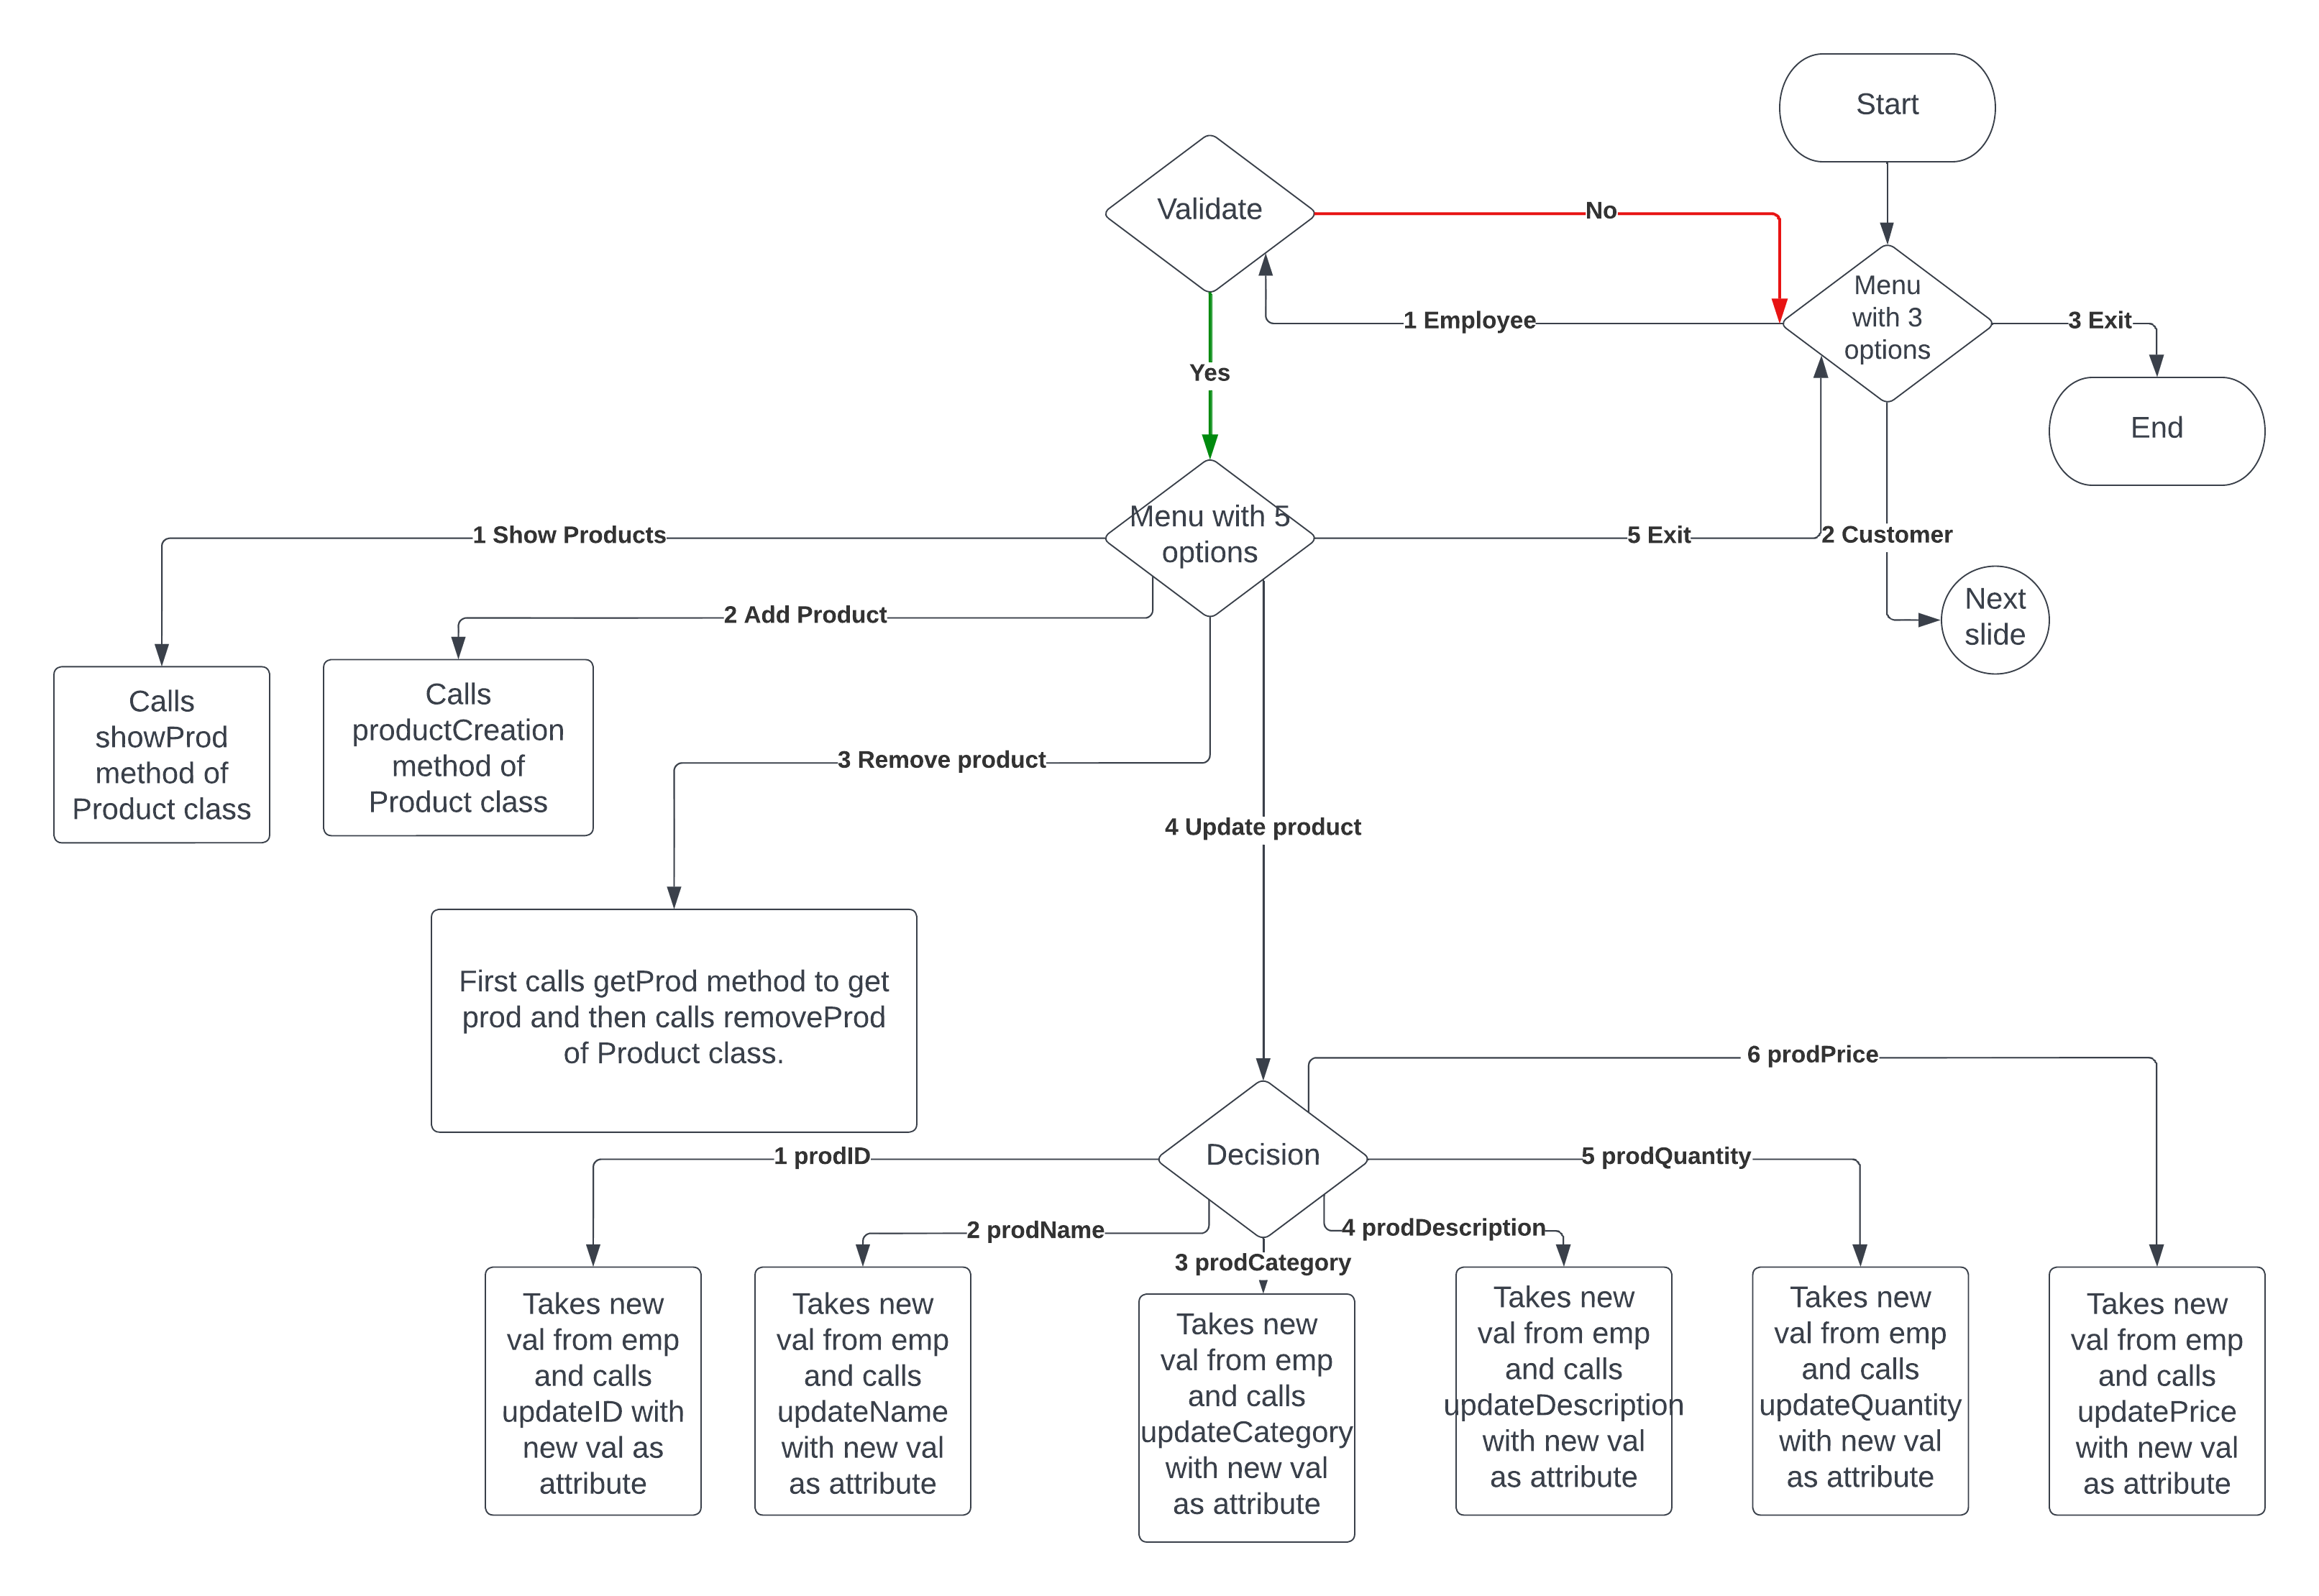

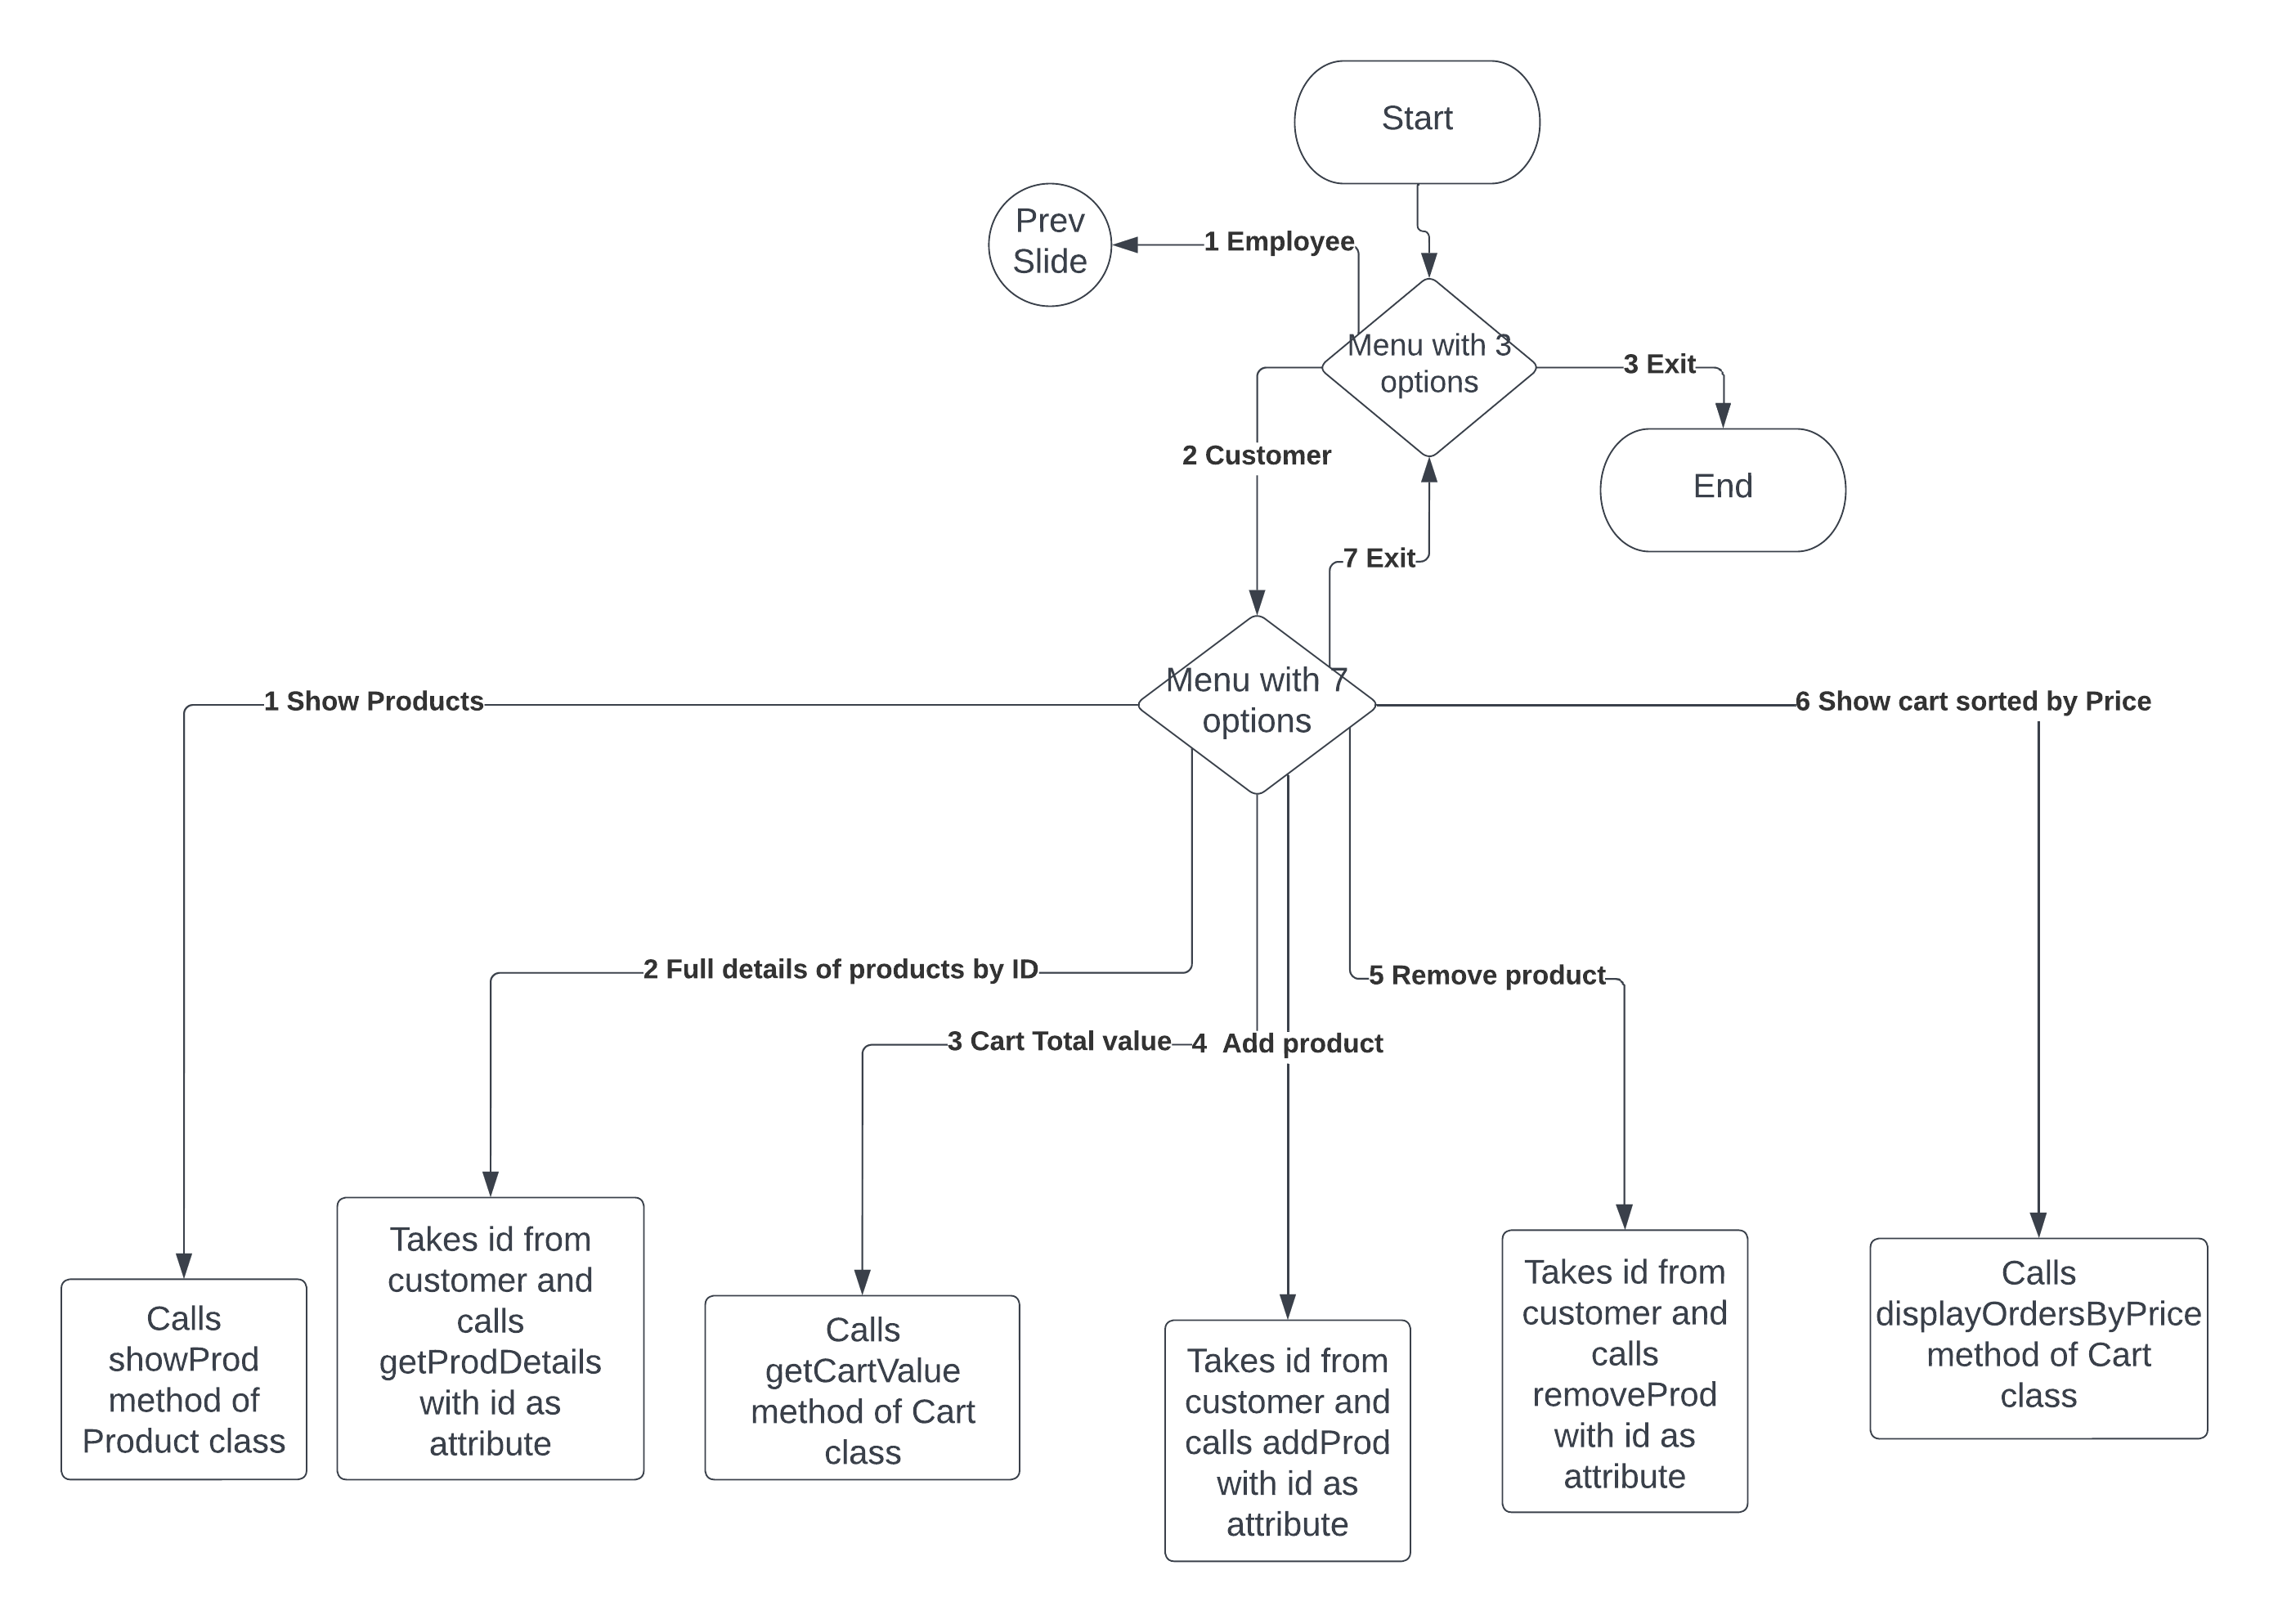

In [9]:
while True:                                                  #Looping until there is a break. By this user can countinously get prompted with the menu
    print("\nMAIN MENU")                                     #Main menu header
    print("1. Are you an Employee?")                         #For Employee option
    print("2. Are you a Customer?")                          #For Customer option
    print("3. Exit")                                         #To break the loop or to exit menu
    try:                                                     #Try Block
        choice1 = int(input("Enter the Choice:  "))          #User choice from the above menu
    except:                                                  #Except Block
        print("Enter valid input!")                          #Warning user to enter valid input
        continue                                             #After warning, "continue" let's me view Menu again  

    # Below block is for Employee case
    if choice1 == 1:                                         #If user is an employee.
        empid = int(input("Enter Your ID: "))                #asks for Id and password
        emppass = input("Enter Your Password: ")             
        if validate(empid,emppass):                          #User ID and password are sent to validate function to verify from Employee object list.
            print("\n Welcome Employee!")                    #If validated correctly
            while True:                                      #Looping until there is a break. By this user can countinously get prompted with the menu
                print("\n1. Show all products")              #Option to show all products available in the stock/with business
                print("2. Add Product")                      #Option to add new product to stock
                print("3. Remove Product")                   #Option to remove a product from stock
                print("4. Update product")                   #Option to edit product details
                print("5. Exit")                             #Exit from Employee's menu and go back to Main menu
                try:                                         
                    choice3 = int(input("Enter the Choice:  ")) #User choice from the above menu
                except:                                      
                    print("Enter valid input!")              #Warning user to enter valid input
                    continue                                 #After warning, "continue" let's me view Menu again 
                c = Cart(Product.prods)                      #Creating object of Cart class
                
                if choice3 == 1:                             #For 1. Show all products
                    Product.showProd(c)                      #Calling showProd of Product class with c as parameter
                    
                elif choice3 == 2:                           #For 2. Add Product
                    productCreation()                        #Calling productCreation to create product
                    
                elif choice3 == 3:                           #For 3. Remove Product
                    idProd = int(input("Enter id of Product to remove: "))#ID of Product to remove from stock
                    objToRemove = Product.getProd(idProd)    #Getting obj to remove based on ID using getProd() of Product class
                    Product.removeProd(objToRemove)          #removing prod by calling removeProd() of Product class with objToRemove as argument

                elif choice3 == 4:                           #For4. Update product
                    updateObjID = int(input("Enter ID of product you want to update: "))#ID of Product to update details
                    print("\n1. prodID")                     
                    print("2. prodName")                     
                    print("3. prodCategory")                 
                    print("4. prodDescription")              
                    print("5. prodQuantity")                 
                    print("6. prodPrice")                    #This menu is for the detail user wants to update
 
                    ch = int(input("Which parameter you want to update?"))#User choice from the above menu
                    updateObj = Product.getProd(updateObjID) #Getting obj to update based on ID using getProd() of Product class
                    if ch == 1:                              #1. prodID
                        newVal = int(input("Enter new value: "))#Getting new value from Employee
                        Product.updateID(updateObj,newVal)   #Calling updateID() of Product class with updateObj,newVal as args 
                    elif ch == 2:                            #2. prodName
                        newVal = input("Enter new value: ")  #Getting new value from Employee
                        Product.updateName(updateObj,newVal) #Calling updateName() of Product class with updateObj,newVal as args
                    elif ch == 3:                            #3. prodCategory
                        newVal = input("Enter new value: ")  #Getting new value from Employee
                        Product.updateCategory(updateObj,newVal)#Calling updateCategory() of Product class with updateObj,newVal as args
                    elif ch == 4:                            #4. prodDescription
                        newVal = input("Enter new value: ")  #Getting new value from Employee
                        Product.updateDescription(updateObj,newVal)#Calling updateDescription() of Product class with updateObj,newVal as args
                    elif ch == 5:                            #5. prodQuantity
                        newVal = int(input("Enter new value: "))#Getting new value from Employee
                        Product.updateQuantity(updateObj,newVal)#Calling updateQuantity() of Product class with updateObj,newVal as args
                    elif ch == 6:                            #6. prodPrice
                        newVal = int(input("Enter new value: "))#Getting new value from Employee
                        Product.updatePrice(updateObj,newVal)#Calling updatePrice() of Product class with updateObj,newVal as args

                elif choice3 == 5:                           #5. Exit
                    break                                    #Exits from Employees menu and goes to Main menu                    
                else:                                        #If Employee enters Invalid option
                    print("Oops! Incorrect Choice.")         
        else:                                                #If credentials doesn't get validated
            print("Wrong credentials!")                      
            
    #Employee code block ends here

    #Customer code block starts here 
    elif choice1 == 2:                                       #If user is an Customer
        print("\n Welcome Customer!")                        
        while True:                                          #Looping until there is a break. By this user can countinously get prompted with the menu
            print("\n1. Show all products")                  #Option to show all products available in the stock/with business
            print("2. Full details of products by ID")       #Option to get full details of specific product by ID
            print("3. Cart Total value")                     #Option to Calculate current worth of cart
            print("4. Add product")                          #Option to add new product to cart
            print("5. Remove product")                       #Option to remove product from cart
            print("6. Show cart sorted by ID")               #Option to Show cart sorted by Price
            print("7. Exit")                                 #Option to exit Customer's menu and go back to Main menu
            try:                                             #Try block
                choice3 = int(input("Enter the Choice:  "))  #User choice from the above menu
            except:                                          #Except block
                print("Enter valid input!")                  #Warning user to enter valid input
                continue                                     #After warning, "continue" let's me view Menu again 
            c = Cart(Product.prods)                          #Creating object of Cart class

            if choice3 == 1:                                 #1. Show all products
                Product.showProd(c)                          #Calling showProd of Product class with c as parameter
                
            elif choice3 == 2:                               #2. Full details of products by ID
                idFullDetails = int(input("Enter ID of product for full details: "))#ID of Product to get full details
                c.getProdDetails(idFullDetails)              #Calling getProdDetails() of c obj with idFullDetails as arg
                
            elif choice3 == 3:                               #3. Cart Total value
                c.getCartValue()                             #Calling getCartValue() of c obj

            elif choice3 == 4:                               #4. Add product
                idToAdd = int(input("Product id to add to cart: "))#ID of Product to add to cart
                c.addProd(idToAdd)                           #Add product of given ID to cart by calling addProd() of c
                print("Added!")                              #Prompting Added

            elif choice3 == 5:                               #5. Remove product
                idToRemove = int(input("Product id to remove from cart: "))#ID of Product to add to cart
                c.removeProd(idToRemove)                     #Remove product of given ID from cart by calling removeProd() of c
                print("Removed!")                            #Prompting Removed

            elif choice3 == 6:                               #6. Show cart sorted by Price
                c.displayOrdersByID()                        #Displays ordersby prices in the cart by calling displayOrdersByPrice() of c

            elif choice3 == 7:                               #7. Exit
                break                                        #Exits from Customer menu and goes to Main menu 
            
            else:                                            #If Employee enters Invalid option
                print("Oops! Incorrect Choice.")             
        
    elif choice1 == 3:                                       #3. Exit
        break                                                #Exits from Application(Main Menu)
      
    else:                                                    #If User enters Invalid option
        print("Oops! Incorrect Choice.")                     


MAIN MENU
1. Are you an Employee?
2. Are you a Customer?
3. Exit
Enter the Choice:  1
Enter Your ID: 1
Enter Your Password: kk
Wrong credentials!

MAIN MENU
1. Are you an Employee?
2. Are you a Customer?
3. Exit
Enter the Choice:  1
Enter Your ID: 11
Enter Your Password: hi

 Welcome Employee!

1. Show all products
2. Add Product
3. Remove Product
4. Update product
5. Exit
Enter the Choice:  1
Product  :   Price   :   ID
mac  :    1000   :    1
dell  :    500   :    2

1. Show all products
2. Add Product
3. Remove Product
4. Update product
5. Exit
Enter the Choice:  2
Number of products you want to enter:1
Product id of 1 : 3
Product Name of 1 : hp
Product Category of 1 : lap
Product Desc of 1 : 12
Product Quantity of 1 : 200
Product price of 1 : 400

1. Show all products
2. Add Product
3. Remove Product
4. Update product
5. Exit
Enter the Choice:  1
Product  :   Price   :   ID
mac  :    1000   :    1
dell  :    500   :    2
hp  :    400   :    3

1. Show all products
2. Add Product
3